# Cell clustering

In [7]:
library(dplyr)
library(ggplot2)
library(viridis)
library(cluster)
library(umap)

[1] 0.1704506

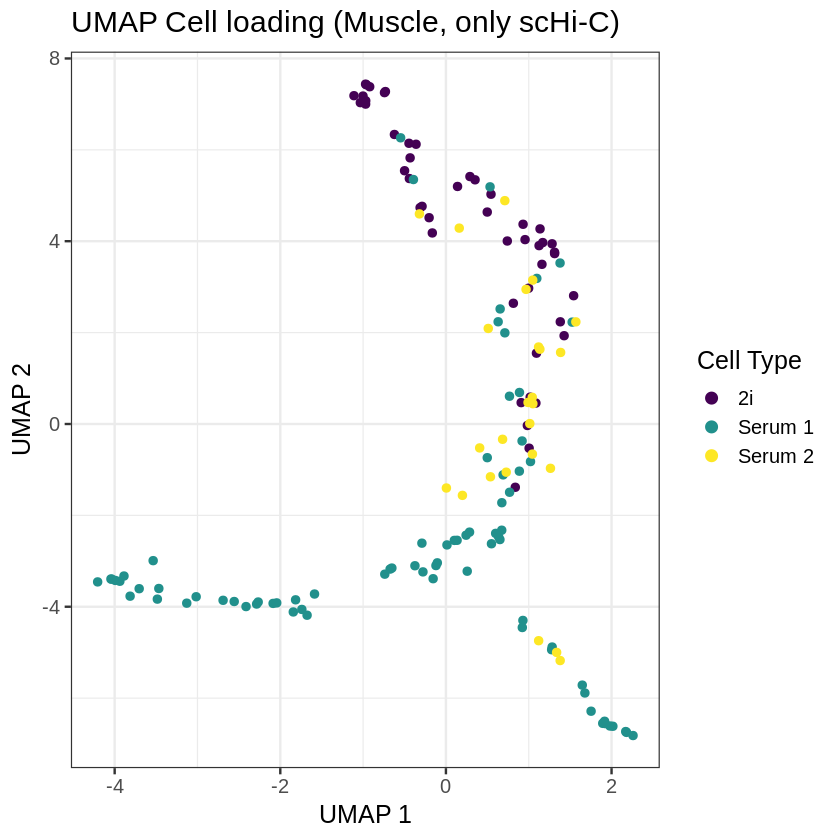

In [59]:
dir_out="/storage08/kwangmoon/R_analysis_result/example"
HiC_result=readRDS(paste0(dir_out,'/HiC_result_final__rank15.rds'))

embeddings=HiC_result[[1]]$C
#embeddings=embeddings[,1:14]
rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])
library('RColorBrewer')
colourCount = length(unique(cell_type[,2]))
getPalette = colorRampPalette(brewer.pal(12, "Paired"))
color_sch=getPalette(colourCount)
color_sch[11]='#0a0a09'




rownames(embeddings)=cell_type[,1]



set.seed(7)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
scHiConly<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")
print(scHiConly)
mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])



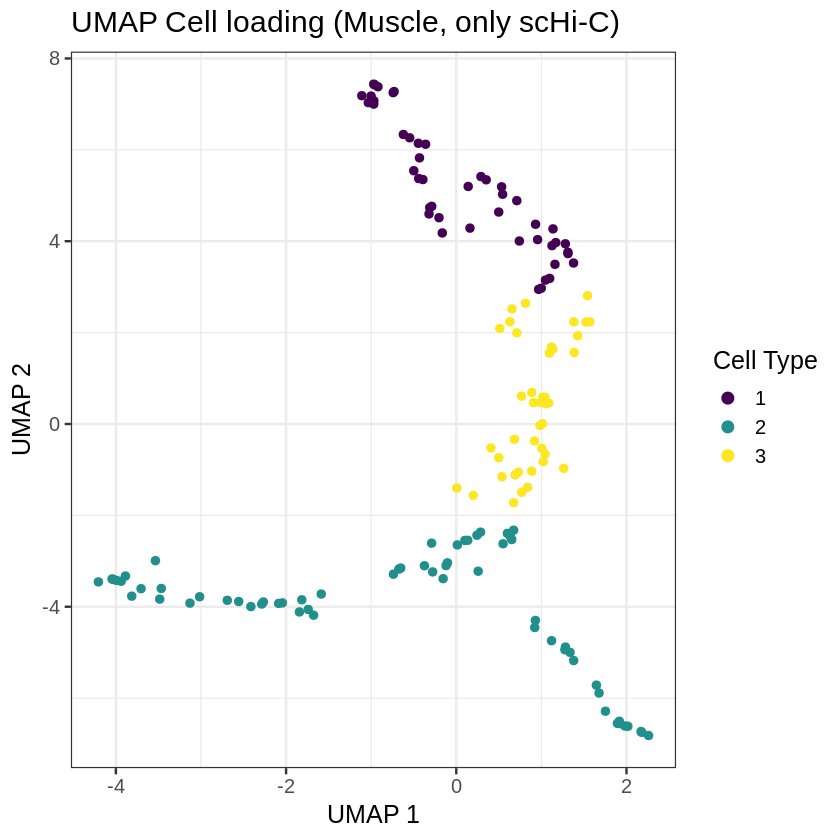

In [60]:
ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color =  factor(kmeans(tmp,3 )$cluster)),size=2)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")


[1] 0.3419643

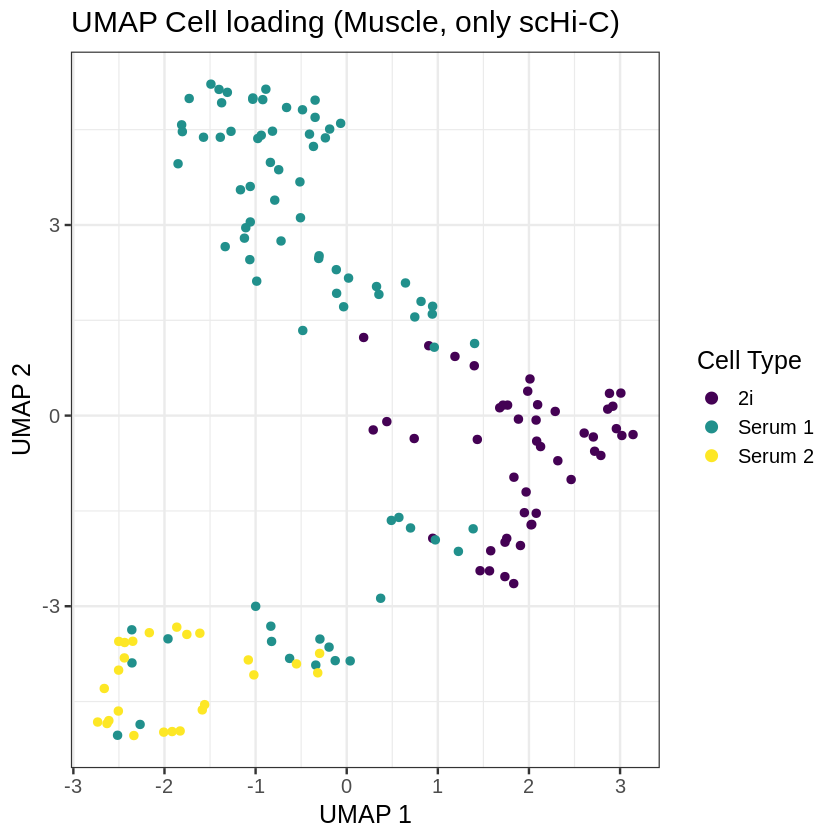

In [73]:
dir_out="/storage08/kwangmoon/R_analysis_result/example_all/"
HiC_result=readRDS(paste0(dir_out,'/HiC_result_final__rank15.rds'))

embeddings=HiC_result[[1]]$C
embeddings=embeddings[,1:12]
rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])
library('RColorBrewer')
colourCount = length(unique(cell_type[,2]))
getPalette = colorRampPalette(brewer.pal(12, "Paired"))
color_sch=getPalette(colourCount)
color_sch[11]='#0a0a09'




rownames(embeddings)=cell_type[,1]



set.seed(7)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
scHiConly<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")
print(scHiConly)
mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])



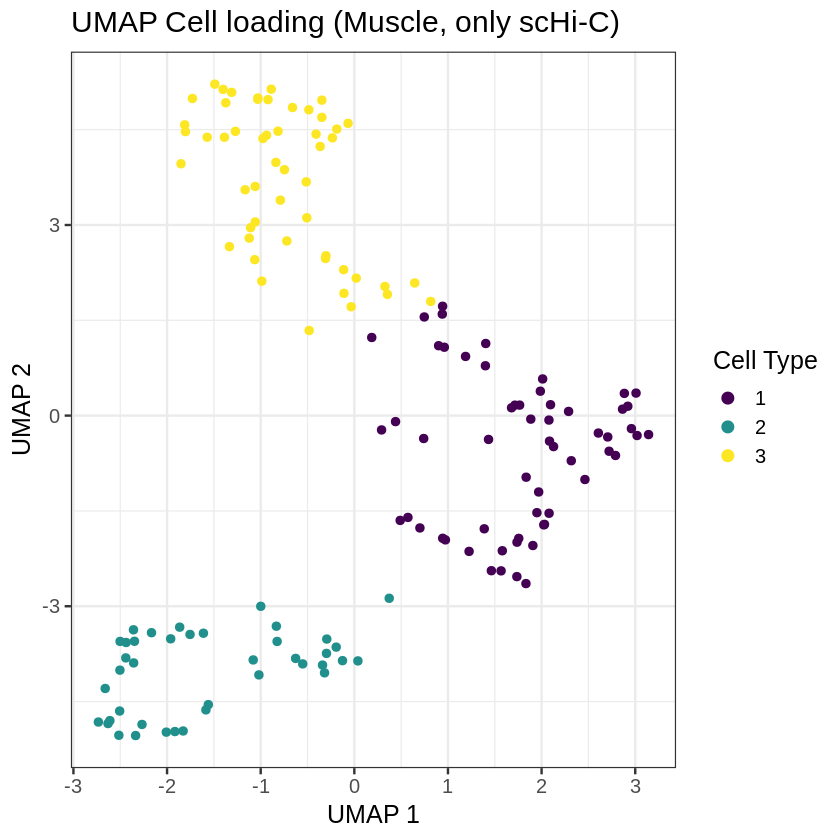

In [74]:
ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color =  factor(kmeans(tmp,3 )$cluster)),size=2)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")


In [76]:

cluster = cell_type[,2]
cluster = as.factor(cluster)
levels(cluster) = c("Astro", "Endo", "L23", "L4", 'L5', 'L6', 'MG', 'MP', 'Ndnf',
                    'ODC', 'OPC', 'Pvalb', 'Sst', 'Vip')
cols = c("dodgerblue2", "#E31A1C", "green4", "#6A3D9A", "#FF7F00",
         "black", "gold1", "skyblue2", "palegreen2", "#FDBF6F",
         "gray70", "maroon", "orchid1", "darkturquoise", "darkorange4",
         "brown")
scale_colour_manual(values=cols)


<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: colour
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: grey50
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train: function
    t

In [83]:
cell_type=readRDS('/storage08/kwangmoon/data/example_lee/cell_type.rds')

In [ ]:
cell_type

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



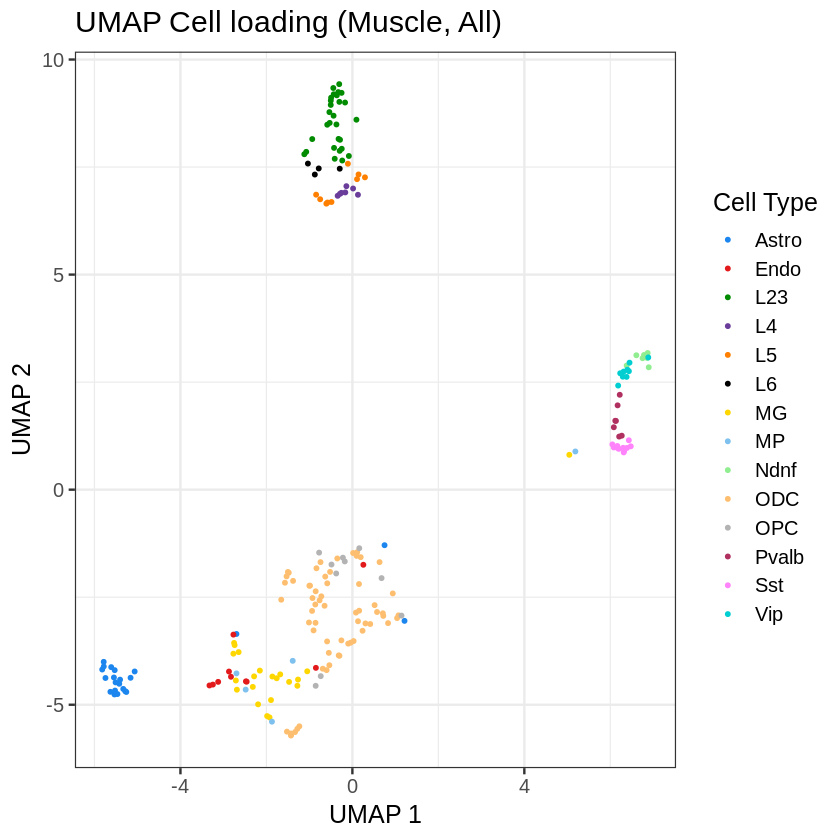

In [106]:
dir_out="/storage08/kwangmoon/R_analysis_result/example_lee_all/"
HiC_result=readRDS(paste0(dir_out,'/HiC_result_final__rank24.rds'))
cell_type=readRDS('/storage08/kwangmoon/data/example_lee/cell_type.rds')
embeddings=HiC_result[[1]]$C
#embeddings=embeddings[,1:15]
rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])
library('RColorBrewer')
colourCount = length(unique(cell_type[,2]))
getPalette = colorRampPalette(brewer.pal(12, "Paired"))
color_sch=getPalette(colourCount)
color_sch[11]='#0a0a09'




rownames(embeddings)=cell_type[,1]



set.seed(4)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
scHiConly<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) +
scale_colour_manual(values=cols)+ geom_point(aes(color = cell_type[,2]),size=1)+
ggtitle("UMAP Cell loading (Muscle, All)")
print(scHiConly)
#mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])



Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



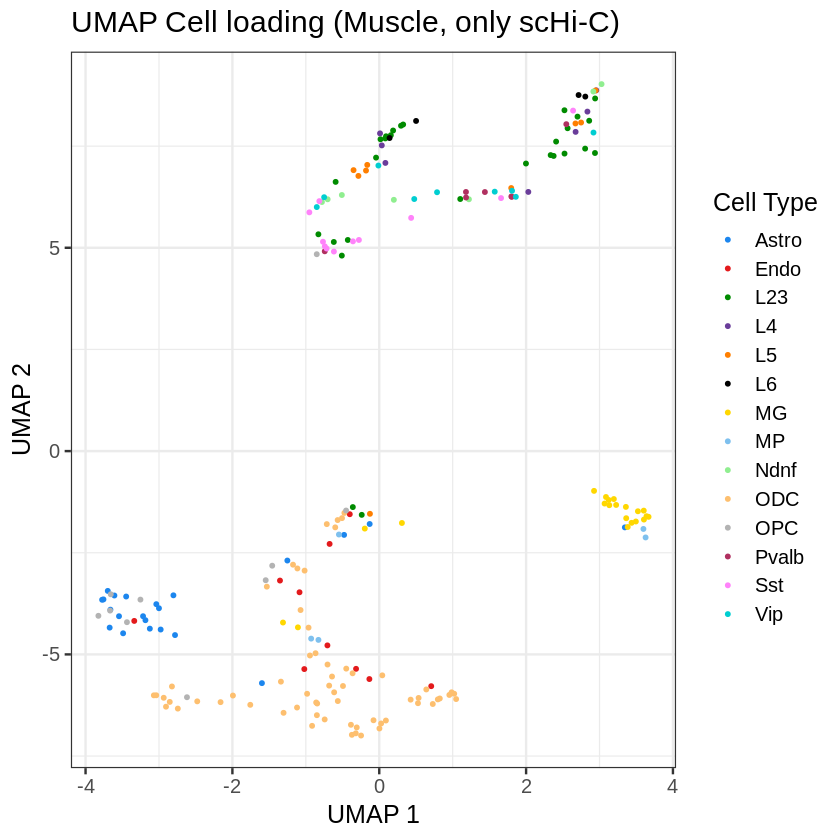

In [107]:
dir_out="/storage08/kwangmoon/R_analysis_result/example_lee_hic/"
HiC_result=readRDS(paste0(dir_out,'/HiC_result_final__rank20.rds'))
cell_type=readRDS('/storage08/kwangmoon/data/example_lee/cell_type.rds')
embeddings=HiC_result[[1]]$C
#embeddings=embeddings[,1:15]
rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])
library('RColorBrewer')
colourCount = length(unique(cell_type[,2]))
getPalette = colorRampPalette(brewer.pal(12, "Paired"))
color_sch=getPalette(colourCount)
color_sch[11]='#0a0a09'




rownames(embeddings)=cell_type[,1]



set.seed(4)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
scHiConly<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) +
scale_colour_manual(values=cols)+ geom_point(aes(color = cell_type[,2]),size=1)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")
print(scHiConly)


In [113]:
#UMAP ARI
set.seed(1)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_label[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))

[1] 0.3246621

[1] 0.3246621

[1] -0.05620673

In [114]:

saveRDS(ARI_UMAP,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_UMAP_Li_Tensor.rds")
saveRDS(ARI_tSNE,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_tSNE_Li_Tensor.rds")
saveRDS(ARI_embeddings,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_embeddings_Li_Tensor.rds")

In [9]:

(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")

[1] 0.1257365

[1] 0.06455186

# Li summary

In [4]:
library(data.table)
library(ggpubr)
require(grid) 


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid



In [6]:
set.seed(1)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
plot_DJBTD<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE)+ggtitle("UMAP Cell loading (DJBTD)")+
geom_point(aes(color = cell_type[,2]),size=0.1) + guides(colour = guide_legend(override.aes = list(size=3)))+ 
theme(text=element_text(size=5))+ rremove("ylab") + rremove("xlab")




filelists=list.files("/p/keles/schic/volumeC/SiqiShen/code/BandNormPaper/paper_prep/01072022/embeddings",pattern="Ren")



In [8]:
filelists

[1] "Ren2019_BandNorm.csv"     "Ren2019_BandScale.csv"   
[3] "Ren2019_CellScale.csv"    "Ren2019_cistopic.csv"    
[5] "Ren2019_CNN.csv"          "Ren2019_CNNBandNorm.csv" 
[7] "Ren2019_CNNcellscale.csv" "Ren2019_higashi.csv"     
[9] "Ren2019_schicluster.csv"

[1] 1
[1] 2
[1] 3
[1] 4


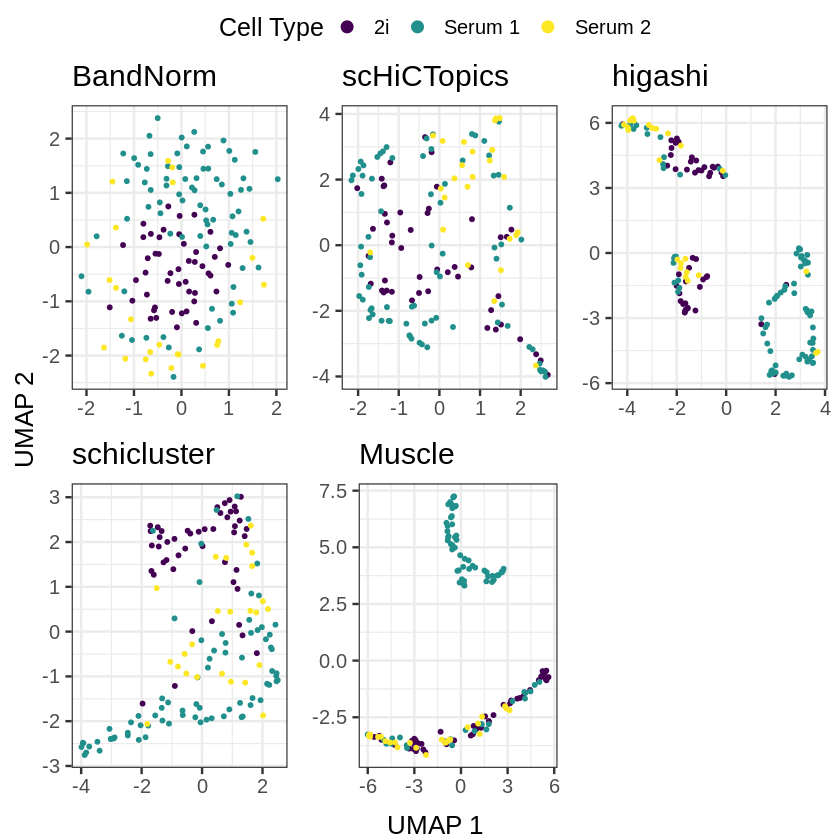

In [8]:
set.seed(1)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
plot_DJBTD<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE)+ggtitle("UMAP Cell loading (Muscle)")+
geom_point(aes(color = cell_type[,2]),size=1) + guides(colour = guide_legend(override.aes = list(size=3)))+ 
theme(text=element_text(size=5))+ rremove("ylab") + rremove("xlab")




filelists=list.files("/p/keles/schic/volumeC/SiqiShen/code/BandNormPaper/paper_prep/01072022/embeddings",pattern="Ren")

#filelists=filelists[c(2:5,8:9)]
filelists=filelists[c(1,4,8,9)]
methodnamelist=word(filelists,2,sep = "_")  %>% substr(.,1,nchar(.)-4)
setwd("/p/keles/schic/volumeC/SiqiShen/code/BandNormPaper/paper_prep/01072022/embeddings")




glist=lapply(1:4,function(k){
print(k)
    set.seed(1)
embeddings=fread(filelists[k])
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
    
    assign(paste0("plot",k),
           ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE)+ggtitle(paste0(methodnamelist[k]))+
geom_point(aes(color = cell_type[,2]),size=1) + guides(colour = guide_legend(override.aes = list(size=3)))+ rremove("ylab") + rremove("xlab")+ theme(text=element_text(size=15))
          )    
    ;return(get(paste0("plot",k)))})



arranged_figs=ggarrange(glist[[1]],glist[[2]]+ggtitle(paste0("scHiCTopics")),glist[[3]],glist[[4]],plot_DJBTD+ggtitle(paste0("Muscle"))+ theme(text=element_text(size=15)),ncol=3,nrow=2,common.legend = TRUE, legend="top")



plot_whole<-annotate_figure(arranged_figs, left = textGrob("UMAP 2", rot = 90, vjust = 1, gp = gpar(cex = 1.3)),
                    bottom = textGrob("UMAP 1", gp = gpar(cex = 1.3)),  fig.lab=" ",fig.lab.size=20,fig.lab.pos="bottom.right")
plot_whole

In [9]:
saveRDS(plot_whole,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/paperprep/Figures/Fig2a.rds')

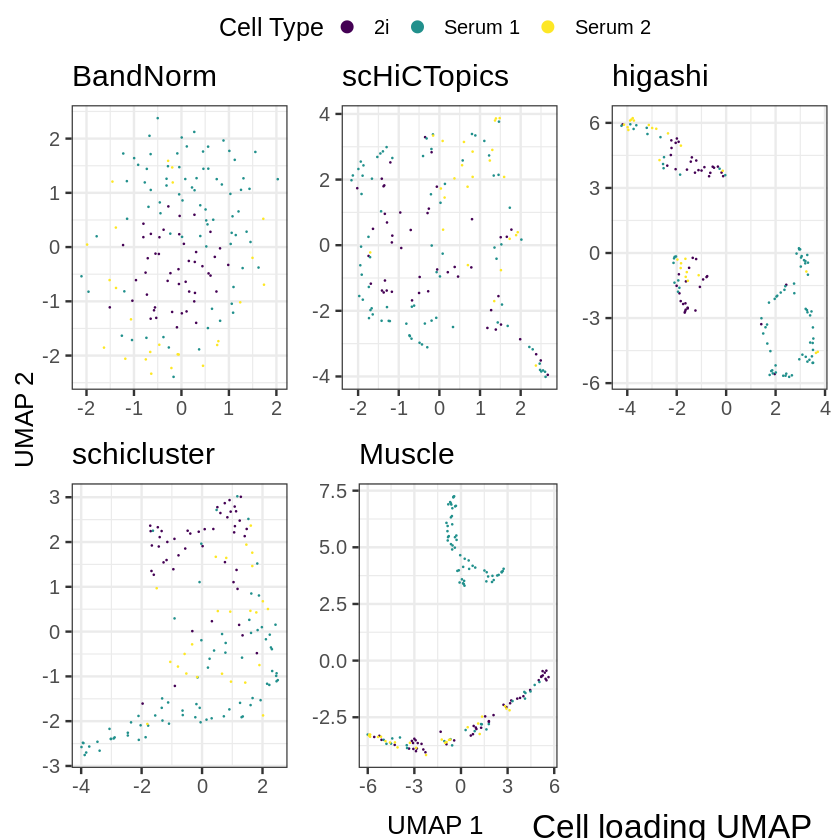

In [11]:
readRDS('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/paperprep/Figures/Fig2a.rds')

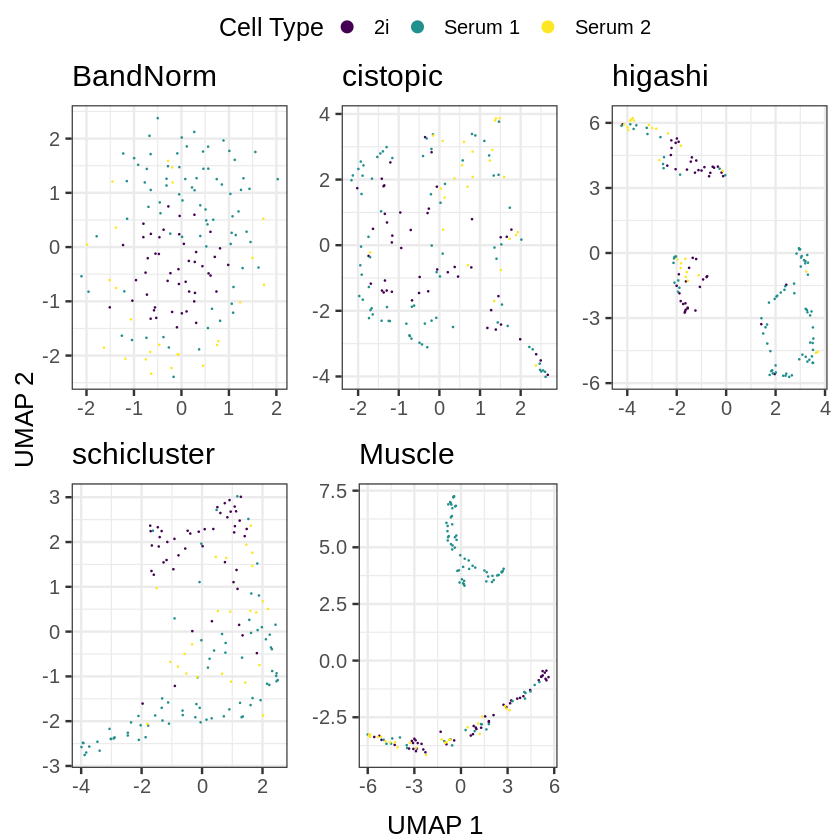

In [10]:
plot_whole<-annotate_figure(arranged_figs, left = textGrob("UMAP 2", rot = 90, vjust = 1, gp = gpar(cex = 1.3)),
                    bottom = textGrob("UMAP 1", gp = gpar(cex = 1.3)))
plot_whole

In [128]:
plot_whole<-annotate_figure(arranged_figs, left = textGrob("UMAP 2", rot = 90, vjust = 1, gp = gpar(cex = 1.3)),
                    bottom = textGrob("UMAP 1", gp = gpar(cex = 1.3)))

In [12]:
setwd('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/data/Li2019')
saveRDS(plot_whole,"UMAP_whole_short.rds")
saveRDS(arranged_figs,"UMAP_arranged_figs.rds")

In [12]:
tmp<-qs::qread('/storage08/kwangmoon/data/Li2019/R/tensor_svd_logdebias_rank15_chr20.qs')

In [13]:
tmp %>% dim

[1] 167 167 150

# only scHi-C

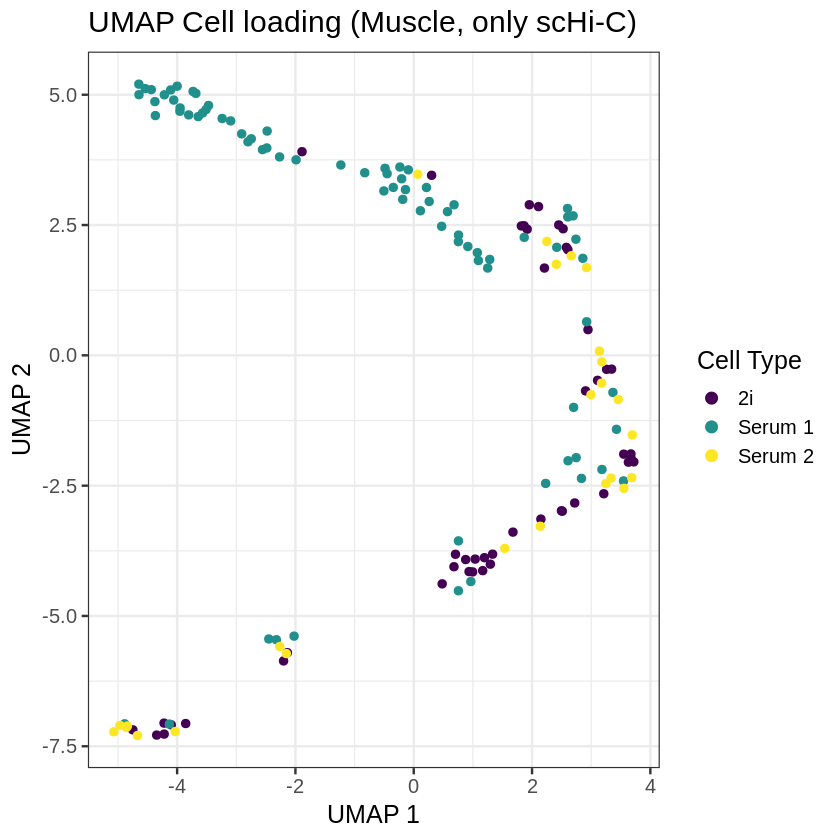

In [4]:
dir_out='/storage08/kwangmoon/R_analysis_result/Li2019/allcells_SVD/DJBTD_debias_NMFnnls/rank15_deflated_svdlogdebias/'
multi_mle2_res=list(readRDS(paste0(dir_out,'result_final__rank15.rds')))

embeddings=multi_mle2_res[[1]][[1]]$C
rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])
library('RColorBrewer')
colourCount = length(unique(cell_type[,2]))
getPalette = colorRampPalette(brewer.pal(12, "Paired"))
color_sch=getPalette(colourCount)
color_sch[11]='#0a0a09'




rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])


embeddings=embeddings[,1:12]
cell_label=cell_type
#7
set.seed(7)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
#plot_Muscle_cgonly<-
scHiConly<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")
print(scHiConly)
#mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])



In [324]:
#UMAP ARI
embeddings=multi_mle2_res[[1]][[1]]$C[,1:14]
set.seed(7)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_label[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")

[1] 0.2913105

[1] 0.1319603

[1] 0.0558702

[1] 0.1191812

[1] 0.08448608

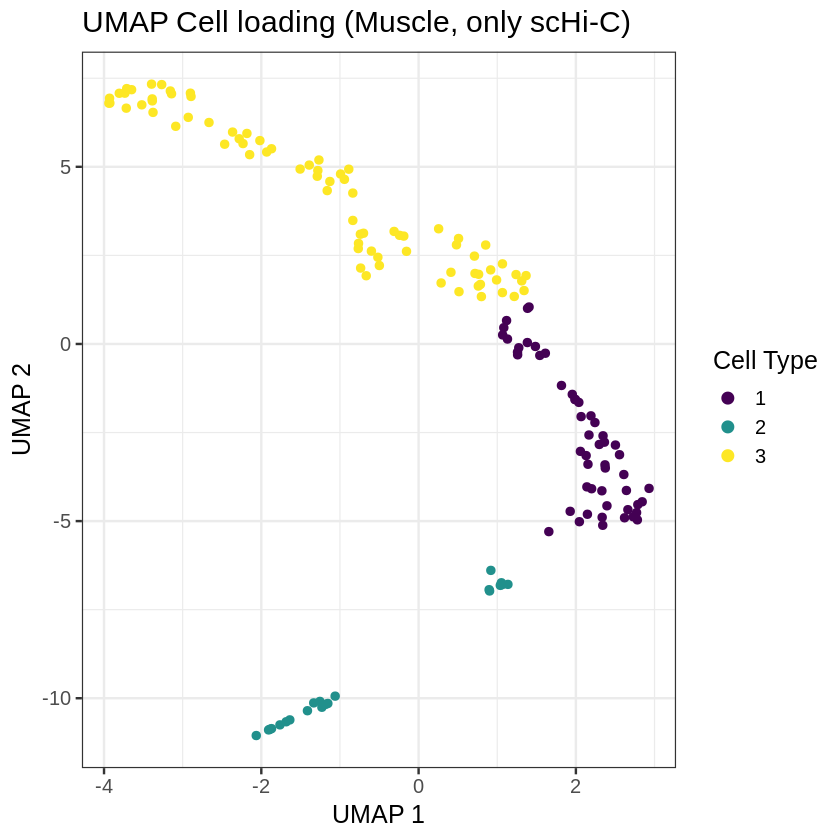

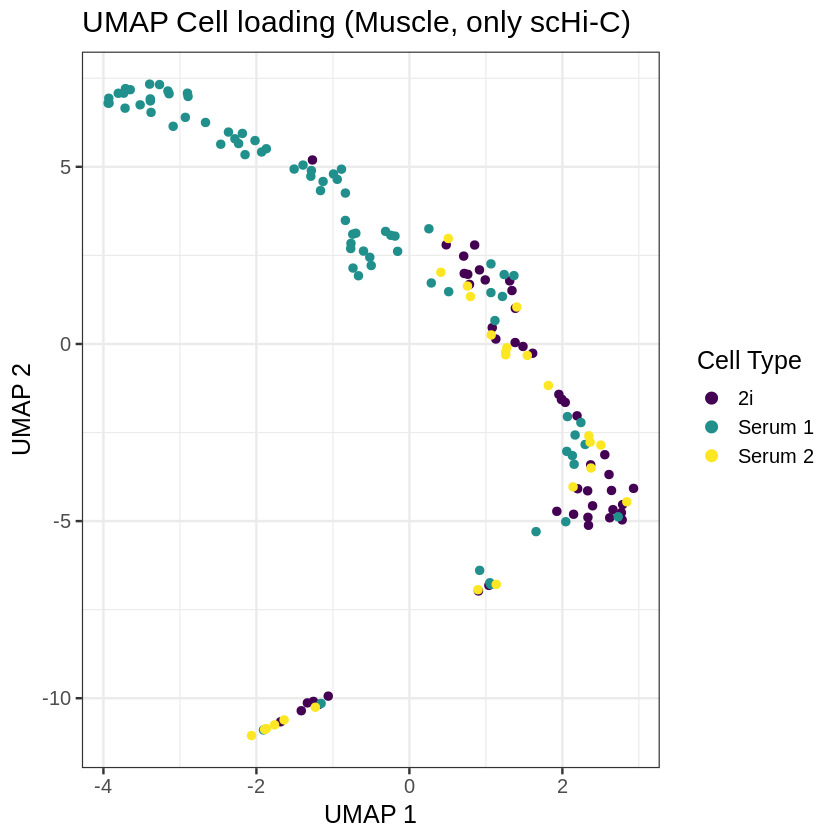

In [231]:
dir_out='/storage08/kwangmoon/R_analysis_result/Li2019/allcells_SVD/DJBTD_debias_NMFnnls/rank15_deflated_svdlogdebias/'
multi_mle2_res=list(readRDS(paste0(dir_out,'result_final__rank15.rds')))

embeddings=multi_mle2_res[[1]][[1]]$C
rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])
library('RColorBrewer')
colourCount = length(unique(cell_type[,2]))
getPalette = colorRampPalette(brewer.pal(12, "Paired"))
color_sch=getPalette(colourCount)
color_sch[11]='#0a0a09'




rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])


embeddings=embeddings[,1:14]
cell_label=cell_type
#7
set.seed(7)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)


colnames(tmp) = c("X1", "X2")
#plot_Muscle_cgonly<-
p<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color =  factor(kmeans(tmp,3 )$cluster)),size=2)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")
print(p)
#mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])




colnames(tmp) = c("X1", "X2")
#plot_Muscle_cgonly<-
p<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color =  cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (Muscle, only scHi-C)")
print(p)
#mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])




In [232]:
#UMAP ARI
set.seed(7)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_label[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")

[1] 0.2913105

[1] 0.1319603

[1] 0.0558702

[1] 0.1191812

[1] 0.08448608

In [233]:

saveRDS(ARI_UMAP,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_UMAP_Li_Tensor_modify.rds")
saveRDS(ARI_tSNE,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_tSNE_Li_Tensor_modify.rds")
saveRDS(ARI_embeddings,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_embeddings_Li_Tensor_modify.rds")
#(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor_modify.rds")
#(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor_modify.rds")

# Fast Higashi

In [5]:
setwd('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/data/Li2019')
cell_type2=qs::qread('cell_type.qs')
label_info<-data.table::fread("/storage08/kwangmoon/R_analysis_result/Li2019/FastHigashi/label_info.txt")
cell_type2=cell_type2[label_info$index+1,]


## R=15

In [6]:
setwd('/storage08/kwangmoon/data/Li2019/FastHigashi')
pd <- import("pandas")
alldim_res_15 <- pd$read_pickle("result/results_alldim1_0.6_rank_15_niterp_1_.pkl")


In [13]:
fembeddings<-read.csv('/storage08/kwangmoon/data/Li2019/FastHigashi/result/fastHigashi_Embedding.csv',header = FALSE)

In [297]:
qs::qsave(cell_type2,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/cell_type_Li_fasthigashi')

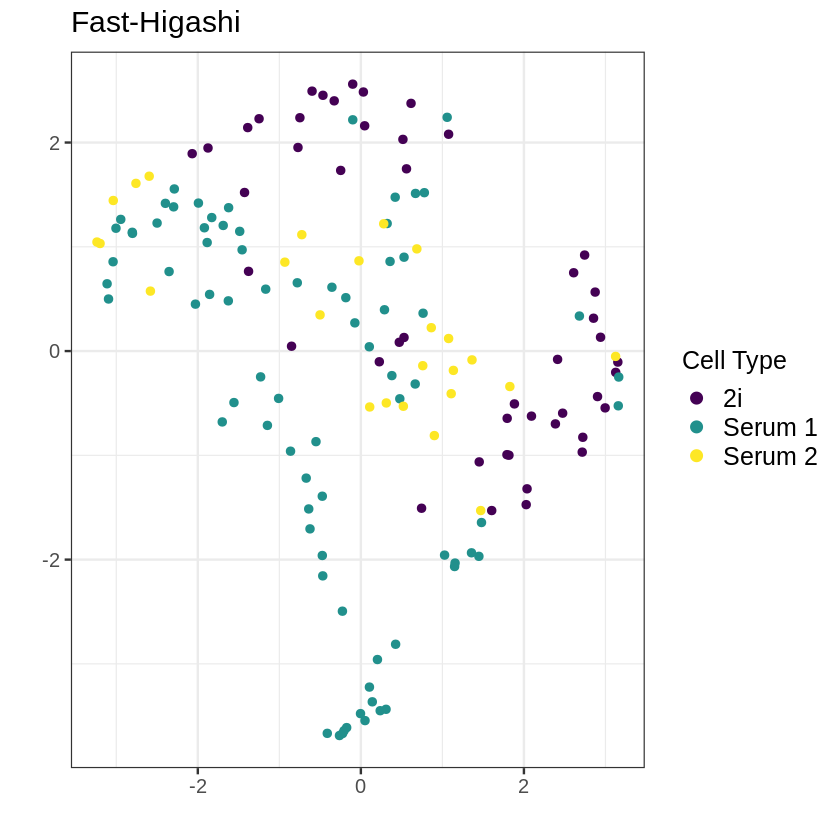

In [14]:
embeddings_fasthigashi=fembeddings#qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI_pc.qs')
#cell_label=cell_type
set.seed(1)
tmp= umap(embeddings_fasthigashi)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab(" ") +
        xlab(" ") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type2[,2]),size=2)+
ggtitle(paste0("Fast-Higashi"))+ theme(text=element_text(size=15),legend.text=element_text(size=15))

#mean(silhouette(as.numeric(as.factor(cell_type_3dvi)), dist(data.frame(tmp)))[, 3])

## batch correction

In [35]:
#cell_type2
#depth=fread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/data/Li2019/Ren2019_summary.txt')$depth[label_info$index+1]
depth=fread('/storage08/kwangmoon/data/Li2019/FastHigashi/result/cell_feats.txt')$V1
lmres<-lm(as.matrix(fembeddings)~depth)
fembeddings_depth_corrected=lmres$residuals



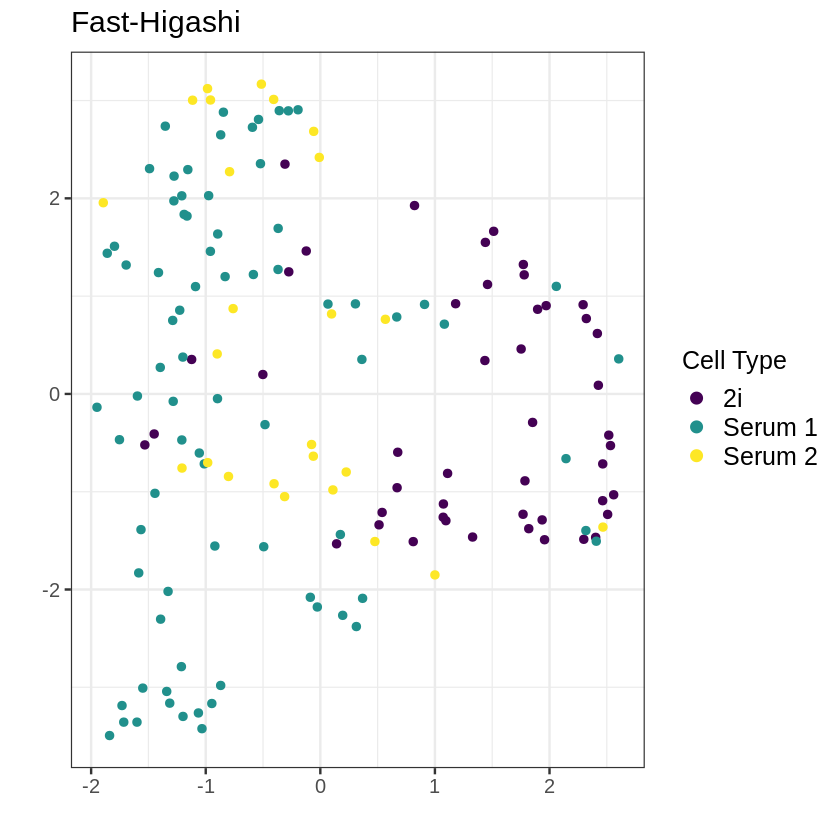

In [36]:
embeddings_fasthigashi=fembeddings_depth_corrected
#cell_label=cell_type
set.seed(1)
tmp= umap(embeddings_fasthigashi)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab(" ") +
        xlab(" ") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type2[,2]),size=2)+
ggtitle(paste0("Fast-Higashi"))+ theme(text=element_text(size=15),legend.text=element_text(size=15))

#mean(silhouette(as.numeric(as.factor(cell_type_3dvi)), dist(data.frame(tmp)))[, 3])

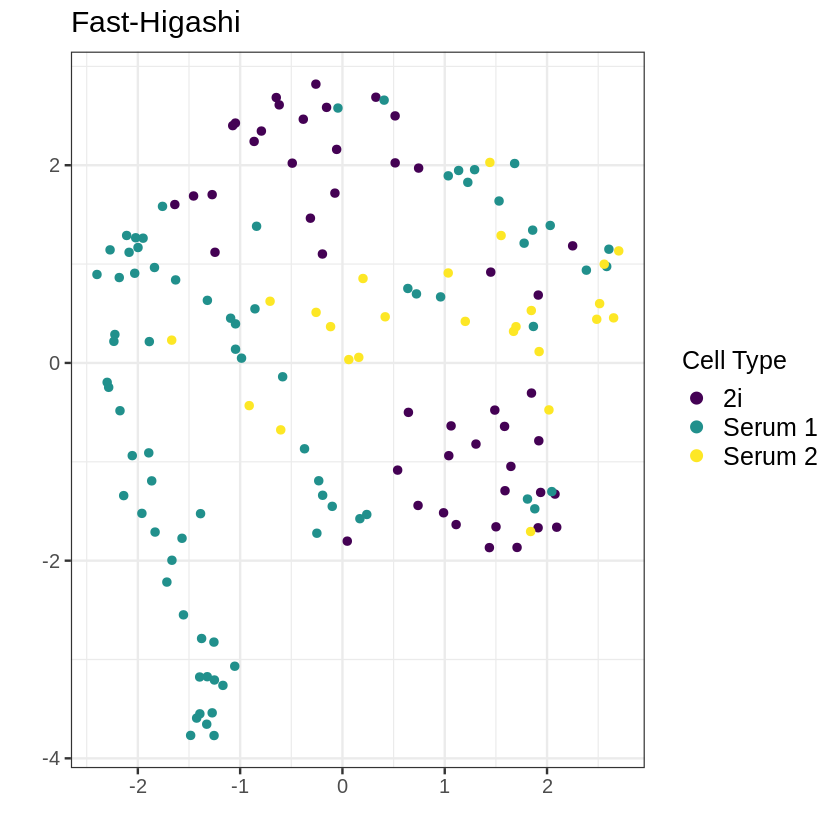

In [7]:
embeddings_fasthigashi=alldim_res_15[[4]]#qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI_pc.qs')
#cell_label=cell_type
set.seed(1)
tmp= umap(embeddings_fasthigashi)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab(" ") +
        xlab(" ") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type2[,2]),size=2)+
ggtitle(paste0("Fast-Higashi"))+ theme(text=element_text(size=15),legend.text=element_text(size=15))

#mean(silhouette(as.numeric(as.factor(cell_type_3dvi)), dist(data.frame(tmp)))[, 3])

## R=64

In [9]:
setwd('/storage08/kwangmoon/data/Li2019/FastHigashi')
pd <- import("pandas")
alldim_res_64 <- pd$read_pickle("result/results_alldim1_0.6_rank_64_niterp_1_.pkl")


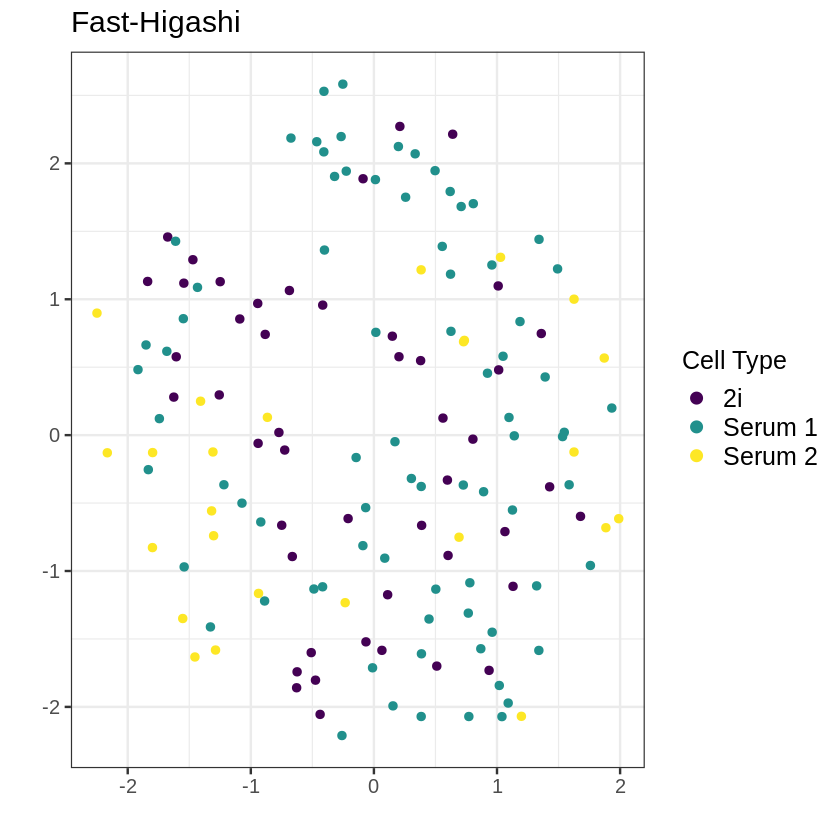

In [10]:
embeddings_fasthigashi=alldim_res_64[[4]]#qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI_pc.qs')
#cell_label=cell_type
set.seed(1)
tmp= umap(embeddings_fasthigashi)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab(" ") +
        xlab(" ") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type2[,2]),size=2)+
ggtitle(paste0("Fast-Higashi"))+ theme(text=element_text(size=15),legend.text=element_text(size=15))

#mean(silhouette(as.numeric(as.factor(cell_type_3dvi)), dist(data.frame(tmp)))[, 3])

In [15]:
#UMAP ARI for FastHigashi
embeddings=fembeddings#alldim_res_15[[4]]
set.seed(1)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_type2[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_type2[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_type2[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")




[1] 0.0608723

[1] 0.1583761

[1] 0.005945935

[1] -0.005637703

[1] 0.07296389

In [37]:
#UMAP ARI for FastHigashi
embeddings=fembeddings_depth_corrected#alldim_res_15[[4]]
set.seed(1)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_type2[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_type2[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_type2[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")




[1] 0.2000271

[1] 0.09186048

[1] 0.01732252

[1] 0.03772603

[1] 0.06856043

In [38]:

saveRDS(ARI_UMAP,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_UMAP_Li_FastHigashi.rds")
saveRDS(ARI_tSNE,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_tSNE_Li_FastHigashi.rds")
saveRDS(ARI_embeddings,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_embeddings_Li_FastHigashi.rds")
saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_FastHigashi.rds")
saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_FastHigashi.rds")

# 3DVI

In [ ]:
#don't run this
library(dplyr)
library(purrr)
library(data.table)
cell_type=qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/data/Li2019/cell_type.qs')
wholefiles<-lapply(list.files('/afs/cs.wisc.edu/p/keles/schic/volumeA/Ren2019/3DVI_latent'),function(x)fread(paste0('/afs/cs.wisc.edu/p/keles/schic/volumeA/Ren2019/3DVI_latent/',x)))
                   
                   
wholefiles_trans=lapply(wholefiles,function(x){
    
tmp=data.frame(matrix(0,nrow=dim(cell_type)[1],ncol=(dim(x)[2]-1)))
tmp[x$V1+1,]=x[,-1]
return(tmp)    
    
})
whole3DVI_embeddings<-do.call("cbind",wholefiles_trans)                   
                   
         
qs::qsave(whole3DVI_embeddings,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI.qs')
svds_res<-RSpectra::svds(scale(whole3DVI_embeddings),k = 50)

qs::qsave(svds_res$u,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI_pc.qs')
          

In [23]:
#whole3DVI_embeddings=qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI.qs')
#prcres=prcomp(whole3DVI_embeddings,rank=50)
prcres=qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI_prcomp.qs')

In [19]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [20]:
cell_type_3dvi<-fread('/afs/cs.wisc.edu/p/keles/schic/volumeA/Ren2019/Ren_Cluster.csv')$cluster
#embeddings_3DVI=qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI_pc.qs')

In [ ]:
#qs::qsave(cell_type_3dvi,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/cell_type_Li_3dvi')

[1] 0.0271194

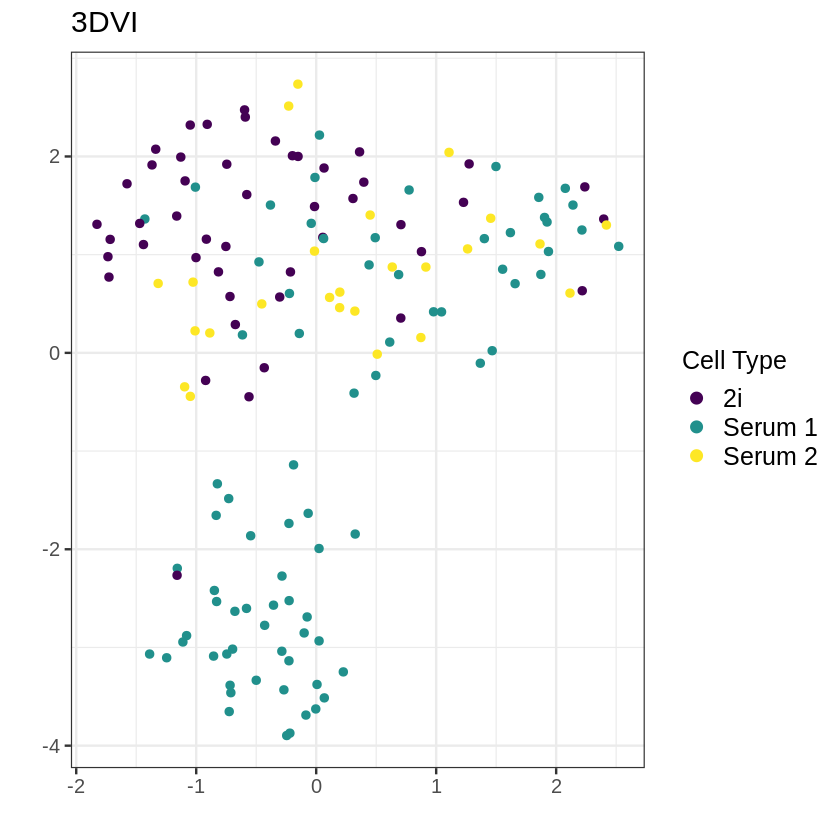

In [24]:
embeddings_3DVI=prcres$x[,1:20]#qs::qread('/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/embeddings/Li2019_3DVI_pc.qs')
#cell_label=cell_type
set.seed(1)
tmp= umap(embeddings_3DVI)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab(" ") +
        xlab(" ") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type_3dvi),size=2)+
ggtitle(paste0("3DVI"))+ theme(text=element_text(size=15),legend.text=element_text(size=15))

mean(silhouette(as.numeric(as.factor(cell_type_3dvi)), dist(data.frame(tmp)))[, 3])

In [270]:
#UMAP ARI for 3DVI
set.seed(1)
embeddings=embeddings_3DVI
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_type_3dvi
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_type_3dvi)), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_type_3dvi)), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")




[1] 0.2333202

[1] 0.224469

[1] 0.03083307

[1] 0.0271194

[1] 0.02987075

In [271]:

saveRDS(ARI_UMAP,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_UMAP_Li_3DVI.rds")
saveRDS(ARI_tSNE,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_tSNE_Li_3DVI.rds")
saveRDS(ARI_embeddings,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/ARI_embeddings_Li_3DVI.rds")
#(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_3DVI.rds")
#(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_3DVI.rds")

# entire

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


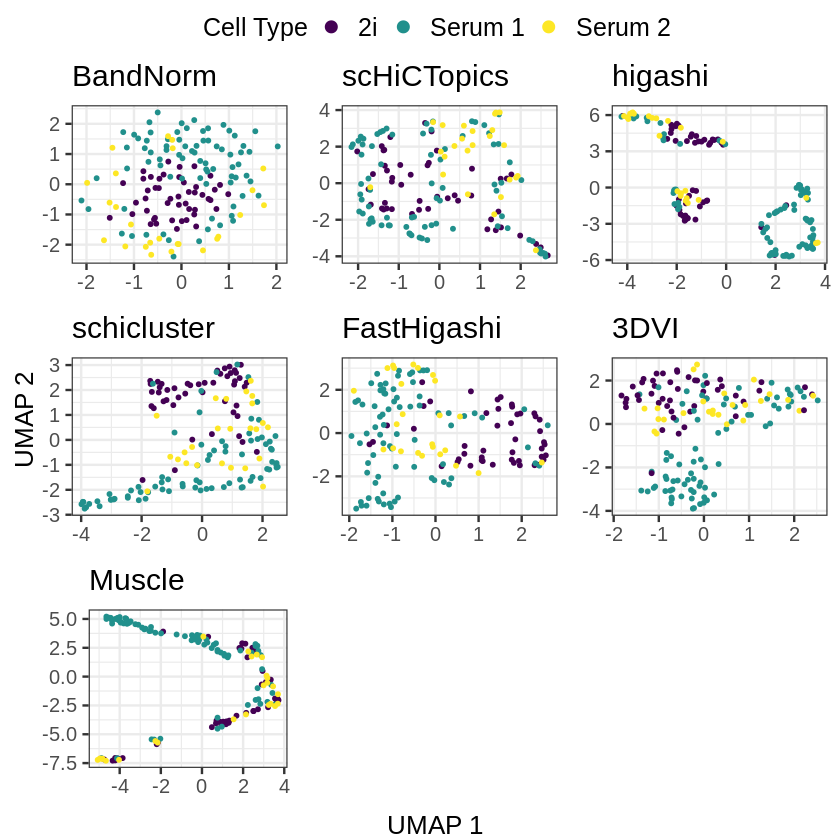

In [39]:
set.seed(7)
embeddings=multi_mle2_res[[1]][[1]]$C[,1:12]
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
plot_DJBTD<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE)+ggtitle("UMAP Cell loading (Muscle)")+
geom_point(aes(color = cell_type[,2]),size=1) + guides(colour = guide_legend(override.aes = list(size=3)))+ 
theme(text=element_text(size=5))+ rremove("ylab") + rremove("xlab")




filelists=list.files("/p/keles/schic/volumeC/SiqiShen/code/BandNormPaper/paper_prep/01072022/embeddings",pattern="Ren")

#filelists=filelists[c(2:5,8:9)]
filelists=filelists[c(1,4,8,9)]
methodnamelist=word(filelists,2,sep = "_")  %>% substr(.,1,nchar(.)-4)
methodnamelist=c(methodnamelist,"FastHigashi","3DVI")
setwd("/p/keles/schic/volumeC/SiqiShen/code/BandNormPaper/paper_prep/01072022/embeddings")





glist=lapply(1:6,function(k){
print(k)
    set.seed(1)
if((k!=5)&(k!=6))embeddings=fread(filelists[k])
if(k==5){embeddings=fembeddings_depth_corrected;cell_type=cell_type2}
if(k==6){embeddings=embeddings_3DVI;cell_type=cbind(1,cell_type_3dvi)}
    
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
    
    assign(paste0("plot",k),
           ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE)+ggtitle(paste0(methodnamelist[k]))+
geom_point(aes(color = cell_type[,2]),size=1) + guides(colour = guide_legend(override.aes = list(size=3)))+ rremove("ylab") + rremove("xlab")+ theme(text=element_text(size=15),legend.text=element_text(size=15))
          )    
    ;return(get(paste0("plot",k)))})



arranged_figs=ggarrange(glist[[1]],glist[[2]]+ggtitle(paste0("scHiCTopics")),glist[[3]],glist[[4]],glist[[5]],glist[[6]],plot_DJBTD+ggtitle(paste0("Muscle"))+ theme(text=element_text(size=15),legend.text=element_text(size=15)),ncol=3,nrow=3,common.legend = TRUE, legend="top")



plot_whole<-annotate_figure(arranged_figs, left = textGrob("UMAP 2", rot = 90, vjust = 1, gp = gpar(cex = 1.3)),
                    bottom = textGrob("UMAP 1", gp = gpar(cex = 1.3)),  fig.lab=" ",fig.lab.size=20,fig.lab.pos="bottom.right")
plot_whole

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6


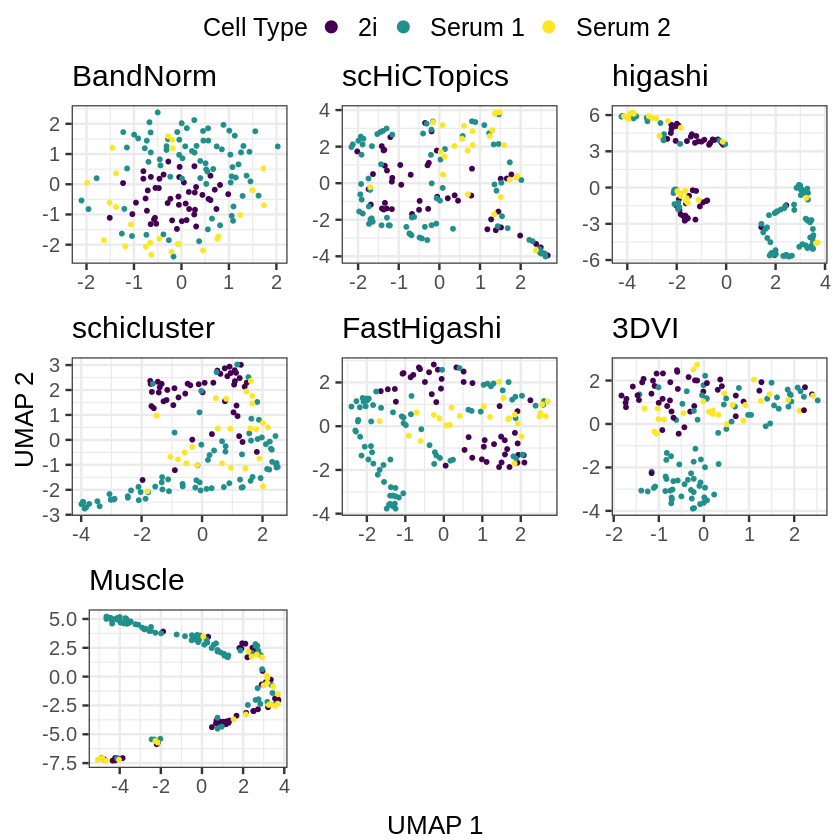

In [291]:
set.seed(7)
embeddings=multi_mle2_res[[1]][[1]]$C[,1:12]
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
plot_DJBTD<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE)+ggtitle("UMAP Cell loading (Muscle)")+
geom_point(aes(color = cell_type[,2]),size=1) + guides(colour = guide_legend(override.aes = list(size=3)))+ 
theme(text=element_text(size=5))+ rremove("ylab") + rremove("xlab")




filelists=list.files("/p/keles/schic/volumeC/SiqiShen/code/BandNormPaper/paper_prep/01072022/embeddings",pattern="Ren")

#filelists=filelists[c(2:5,8:9)]
filelists=filelists[c(1,4,8,9)]
methodnamelist=word(filelists,2,sep = "_")  %>% substr(.,1,nchar(.)-4)
methodnamelist=c(methodnamelist,"FastHigashi","3DVI")
setwd("/p/keles/schic/volumeC/SiqiShen/code/BandNormPaper/paper_prep/01072022/embeddings")





glist=lapply(1:6,function(k){
print(k)
    set.seed(1)
if((k!=5)&(k!=6))embeddings=fread(filelists[k])
if(k==5){embeddings=alldim_res_15[[4]];cell_type=cell_type2}
if(k==6){embeddings=embeddings_3DVI;cell_type=cbind(1,cell_type_3dvi)}
    
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
    
    assign(paste0("plot",k),
           ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE)+ggtitle(paste0(methodnamelist[k]))+
geom_point(aes(color = cell_type[,2]),size=1) + guides(colour = guide_legend(override.aes = list(size=3)))+ rremove("ylab") + rremove("xlab")+ theme(text=element_text(size=15),legend.text=element_text(size=15))
          )    
    ;return(get(paste0("plot",k)))})



arranged_figs=ggarrange(glist[[1]],glist[[2]]+ggtitle(paste0("scHiCTopics")),glist[[3]],glist[[4]],glist[[5]],glist[[6]],plot_DJBTD+ggtitle(paste0("Muscle"))+ theme(text=element_text(size=15),legend.text=element_text(size=15)),ncol=3,nrow=3,common.legend = TRUE, legend="top")



plot_whole<-annotate_figure(arranged_figs, left = textGrob("UMAP 2", rot = 90, vjust = 1, gp = gpar(cex = 1.3)),
                    bottom = textGrob("UMAP 1", gp = gpar(cex = 1.3)),  fig.lab=" ",fig.lab.size=20,fig.lab.pos="bottom.right")
plot_whole

In [40]:
saveRDS(plot_whole,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/paperprep/Figures/Fig2a_allmethods.rds')

# Methylation data

In [16]:
wholechrom_CG=qs::qread("/storage08/kwangmoon/data/Li2019/methylation/wholechrom_CG.qs")

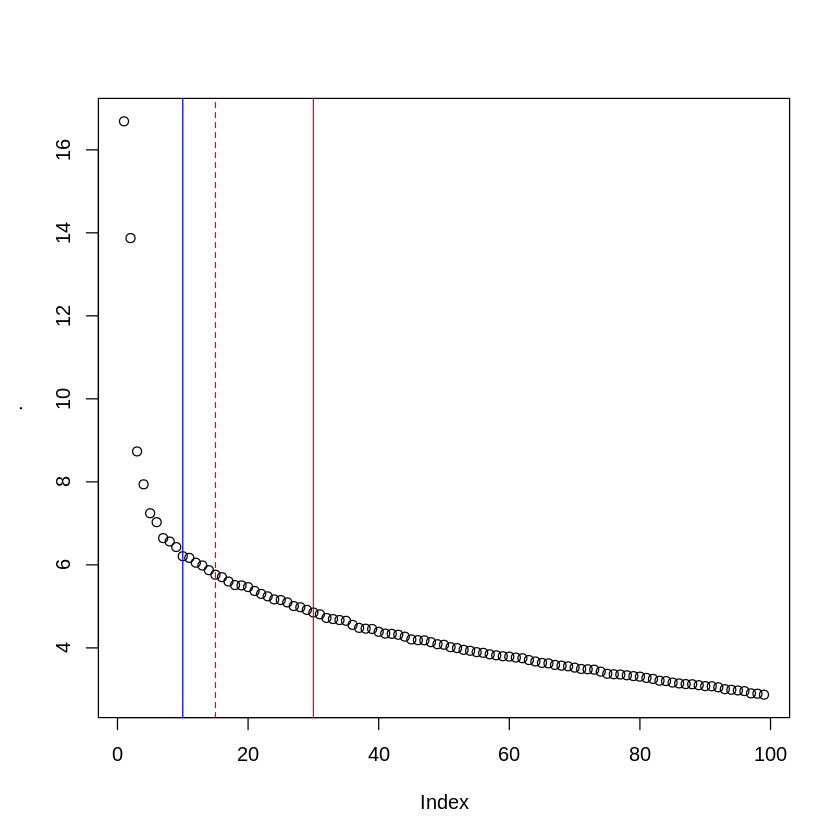

In [18]:
library(RSpectra)
svds_res=svds(wholechrom_CG,k=100)
eig_res=svds_res
nn_eigs=eig_res$d[eig_res$d>0]
(nn_eigs[2:100]  )%>% plot
abline(v=30,col="red")
abline(v=15,col="red",lty=2)
abline(v=10,col="blue")

[1] 0.2929894

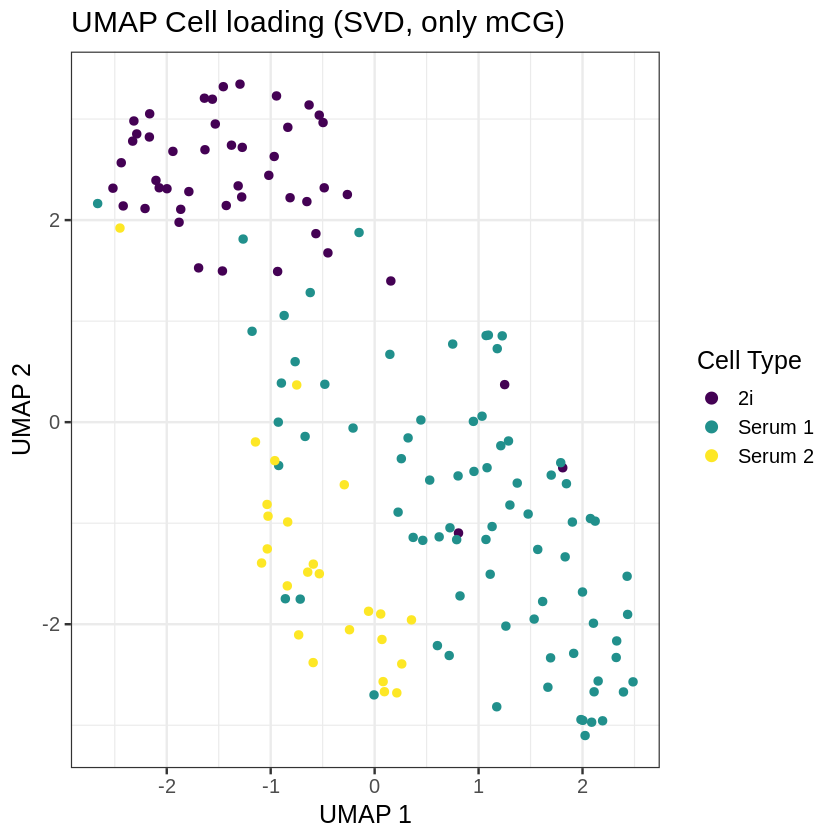

In [33]:
#mean(M_j/N_j)
cell_label=cell_type
set.seed(3)
tmp= umap(svds_res$v[,1:10])$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
#plot_Muscle_cgonly<-
CGonly<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (SVD, only mCG)")

mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])
CGonly

In [34]:
#UMAP ARI
embeddings=svds_res$v[,1:10]
set.seed(3)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_label[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")

[1] 0.3714593

[1] 0.3975167

[1] 0.2921731

[1] 0.2929894

[1] 0.2601746

In [15]:
library(gtools)


Attaching package: ‘gtools’


The following object is masked from ‘package:rrcov3way’:

    permute




[1] 0.1837837

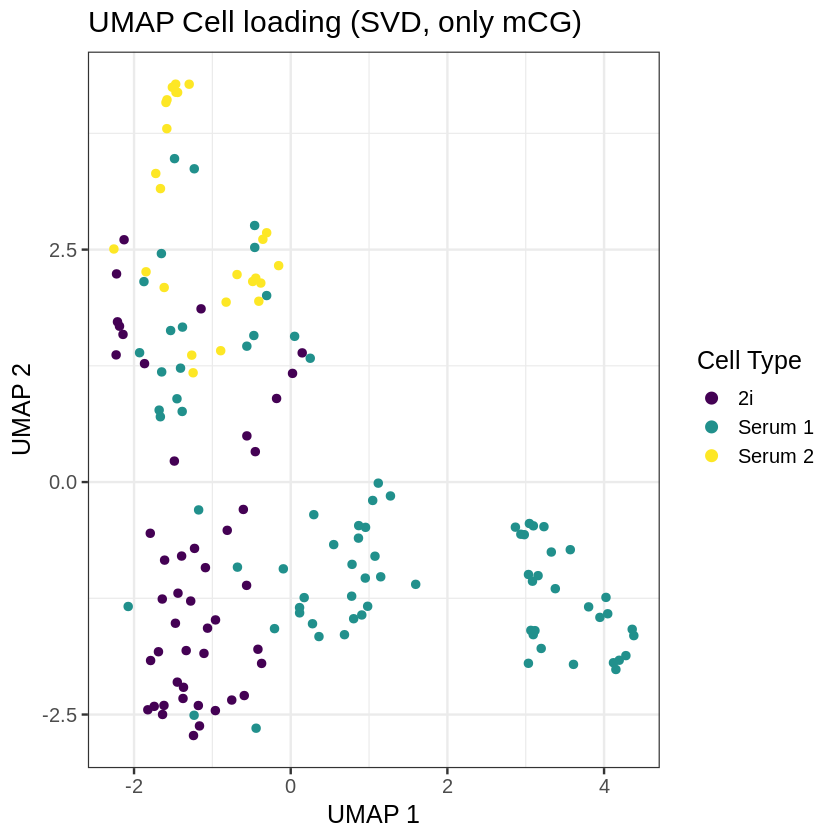

In [307]:
#sum(M_j/N_j)
cell_label=cell_type
set.seed(1)
tmp= umap(svds_res$v[,1:10])$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
#plot_Muscle_cgonly<-
CGonly<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (SVD, only mCG)")

mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])
CGonly

In [308]:
#UMAP ARI
embeddings=svds_res$v[,1:10]
set.seed(1)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_label[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")

[1] 0.1473381

[1] 0.1477608

[1] -0.02963968

[1] 0.1837837

[1] 0.08688163

# Integrative

In [17]:
chr_num=20

cp_res=readRDS(paste0(dir_out,'HiC_result_final__rank7.rds'))



  # result_iter_10_rank27.rds
 tmp=readRDS(paste0(dir_out,'HiC_result_final__rank20.rds'))  
  for(chr in 1:chr_num){
    cp_res[[chr]]$A=cbind(cp_res[[chr]]$A,tmp[[chr]]$A)
    cp_res[[chr]]$B=cbind(cp_res[[chr]]$B,tmp[[chr]]$B)
    cp_res[[chr]]$C=cbind(cp_res[[chr]]$C,tmp[[chr]]$C)
  }

#saveRDS(cp_res,paste0(dir_out,'result_final__rank20.rds'))



In [35]:
methyl_res %>% str

List of 2
 $ Methyl_loci_loading: num [1:2581, 1:20] -11.01 -5.68 -9.62 -8.94 -10.63 ...
 $ Methyl_cell_loading: num [1:150, 1:20] 0.0787 0.0831 0.0825 0.0814 0.0816 ...


In [34]:
chr_num=20

methyl_res=readRDS(paste0(dir_out,'methyl_CG_result_final__rank7.rds'))


 tmp=readRDS(paste0(dir_out,'methyl_CG_result_final__rank20.rds'))  
    methyl_res$Methyl_loci_loading=cbind(methyl_res$Methyl_loci_loading,tmp$Methyl_loci_loading)
    methyl_res$Methyl_cell_loading=cbind(methyl_res$Methyl_cell_loading,tmp$Methyl_cell_loading)


#saveRDS(methyl_res,paste0(dir_out,'methyl_CG_result_final__rank7.rds'))


  # result_iter_10_rank27.rds


In [155]:
#normalized without w
K=15
cellnum=cell_type[,2] %>% table  %>% as.numeric
dir_out='/storage08/kwangmoon/R_analysis_result/Li2019/methyl_HiC/rank15/'

tmp=readRDS(paste0(dir_out,'HiC_result_final__rank',K,'.rds'))
embeddings=cbind(tmp[[1]]$C)
rownames(embeddings)=cell_type[,1]

cell_label=cell_type

embedding_dat=data.frame(embeddings,cell=rownames(embeddings),cell_type=cell_label[,2])





top=50
listofcells_sorted=c()

for(k in 1:K){
    listofcells_sorted=c(listofcells_sorted,(embeddings[,k] %>% abs(.) %>% sort(.,decreasing = T)%>%head(.,top) %>% names %>% word(.,1,sep="_") %>% table  %>% sort(.,decreasing = T) %>% names)[1])
    
    
}

embeddings=embeddings[,1:12]

In [124]:
mean(c(15,10))

[1] 12.5

[1] 0.4047173

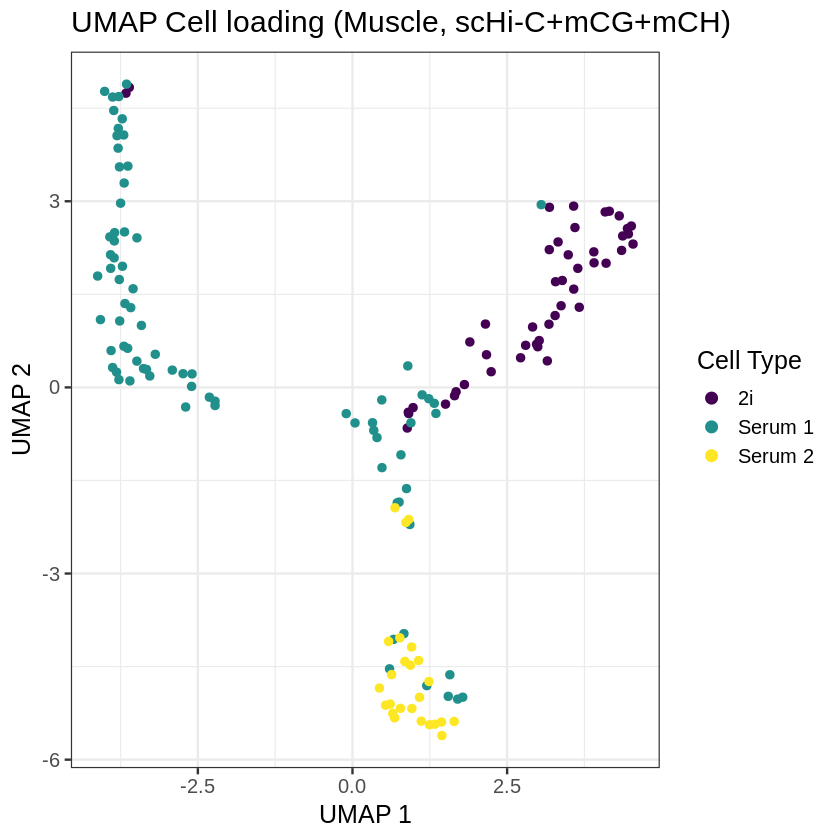

In [156]:
#21
set.seed(9)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
muscle_all<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (Muscle, scHi-C+mCG+mCH)")
mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])
muscle_all

In [157]:
#UMAP ARI
set.seed(9)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_label[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")

[1] 0.4796919

[1] 0.4523842

[1] 0.3459139

[1] 0.4047173

[1] 0.3941775

In [310]:
mean(c(15,10,10))

[1] 11.66667

[1] 0.3705254

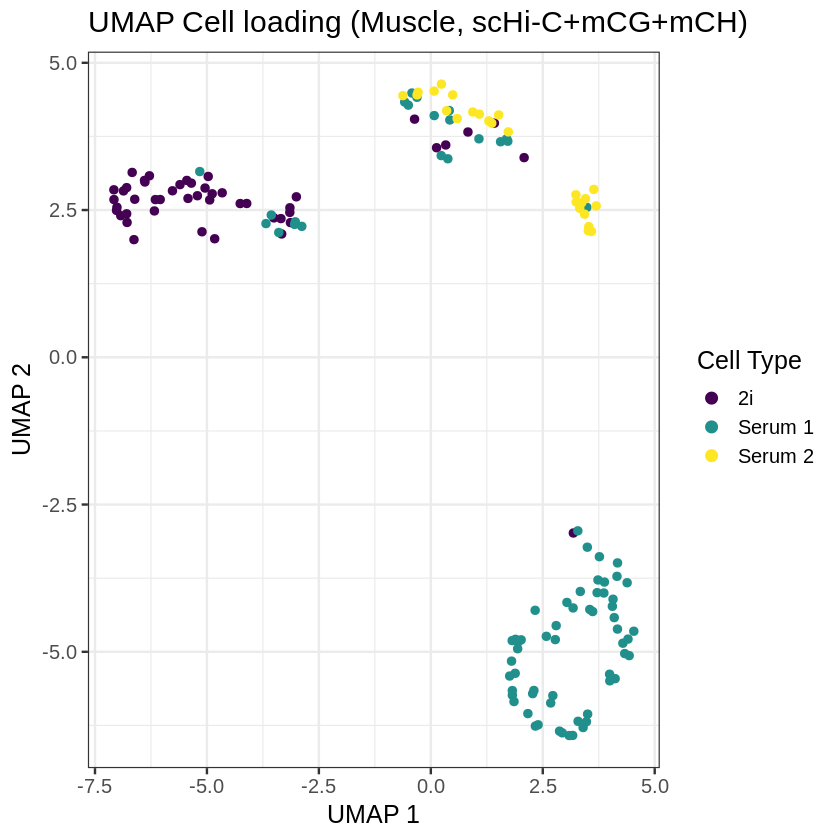

In [95]:

set.seed(6)
tmp= umap(embeddings)$layout
tmp = data.frame(tmp)
colnames(tmp) = c("X1", "X2")
muscle_all<-ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Cell Type")  + ylab("UMAP 2") +
        xlab("UMAP 1") + theme_bw(base_size = 15)+
scale_color_viridis(option="viridis", discrete = TRUE) + 
guides(colour = guide_legend(override.aes = list(size = 3)))+ geom_point(aes(color = cell_type[,2]),size=2)+
ggtitle("UMAP Cell loading (Muscle, scHi-C+mCG+mCH)")
mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tmp)))[, 3])
muscle_all

In [96]:
#UMAP ARI
set.seed(6)
umap_out= umap(embeddings)$layout
clusterN=3
cluster=cell_label[,2]
(ARI_UMAP=adjustedRandIndex(kmeans(umap_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#tSNE ARI
set.seed(1)
tSNE_out= Rtsne(embeddings)$Y

(ARI_tSNE=adjustedRandIndex(kmeans(tSNE_out, centers = clusterN, nstart = 20,iter.max=30)$cluster, cluster))
#embedding ARI
#tSNE_out= Rtsne(embeddings)$Y
set.seed(1)

(ARI_embeddings=adjustedRandIndex(kmeans(embeddings, centers = clusterN, nstart = 20,iter.max = 30)$cluster, cluster))



(sil_umap=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(umap_out)))[, 3]))
#saveRDS(sil_umap,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_UMAP_Li_Tensor.rds")
(sil_tsne=mean(silhouette(as.numeric(as.factor(cell_label[,2])), dist(data.frame(tSNE_out)))[, 3]))
#saveRDS(sil_tsne,"/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/Figures/results/Sil_tSNE_Li_Tensor.rds")

[1] 0.5175582

[1] 0.5175582

[1] 0.5003823

[1] 0.3705254

[1] 0.3668756

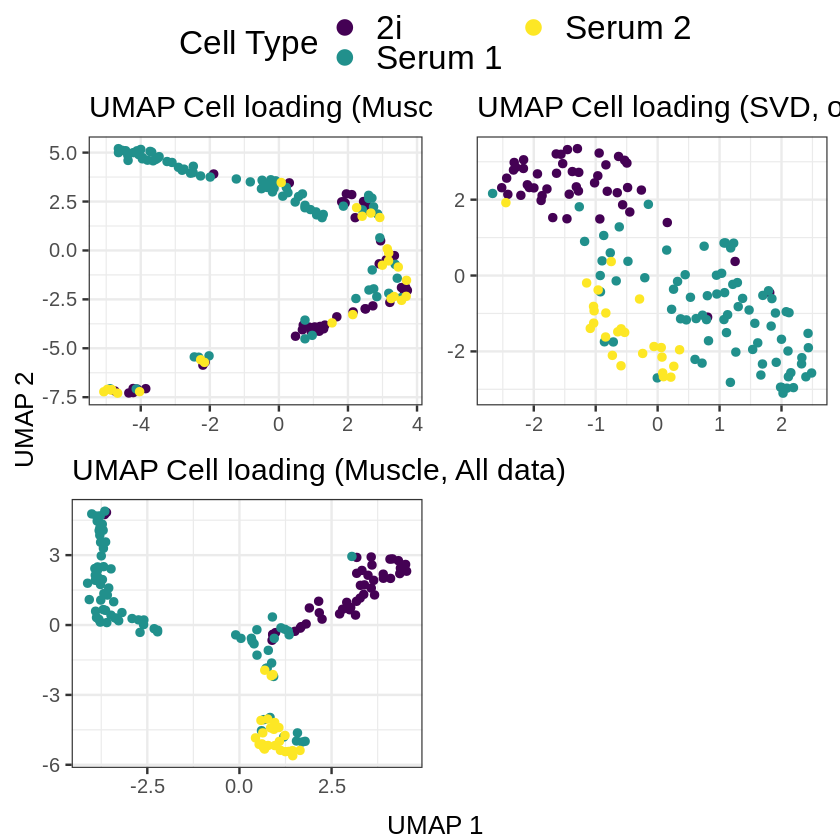

In [159]:


arranged_figs=ggarrange(scHiConly+ guides(colour = guide_legend(nrow=2,override.aes = list(size=4)))+ rremove("ylab") + rremove("xlab")+ theme(text=element_text(size=15),legend.text=element_text(size=20),legend.title=element_text(size=20))
                        ,CGonly+ guides(colour = guide_legend(nrow=2,override.aes = list(size=4)))+ rremove("ylab") + rremove("xlab")+ theme(text=element_text(size=15),legend.text=element_text(size=20)),
                        muscle_all+ guides(colour = guide_legend(nrow=2,override.aes = list(size=4)))+ rremove("ylab") + rremove("xlab")+ theme(text=element_text(size=15),legend.text=element_text(size=20))
                        +ggtitle("UMAP Cell loading (Muscle, All data)")+ guides(colour = guide_legend(nrow=2,override.aes = list(size=4)))+ rremove("ylab") + rremove("xlab")+ theme(text=element_text(size=15),legend.text=element_text(size=20))
                        ,ncol=2,nrow=2,common.legend = TRUE, legend="top")
    


plot_whole<-annotate_figure(arranged_figs, left = textGrob("UMAP 2", rot = 90, vjust = 1, gp = gpar(cex = 1.3)),
                    bottom = textGrob("UMAP 1", gp = gpar(cex = 1.3)))
plot_whole

In [160]:
saveRDS(plot_whole,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/paperprep/Figures/Fig2g.rds')

In [2]:
library(ggplot2)

[1] 0.30 0.13 0.12 0.10 0.37 0.39 0.29 0.26 0.48 0.45 0.40 0.39

[1] "ARI (UMAP)"        "ARI (tSNE)"        "Silhouette (UMAP)"
 [4] "Silhouette (tSNE)" "ARI (UMAP)"        "ARI (tSNE)"       
 [7] "Silhouette (UMAP)" "Silhouette (tSNE)" "ARI (UMAP)"       
[10] "ARI (tSNE)"        "Silhouette (UMAP)" "Silhouette (tSNE)"

[1] "scHi-C" "scHi-C" "scHi-C" "scHi-C" "mCG"    "mCG"    "mCG"    "mCG"   
 [9] "All"    "All"    "All"    "All"

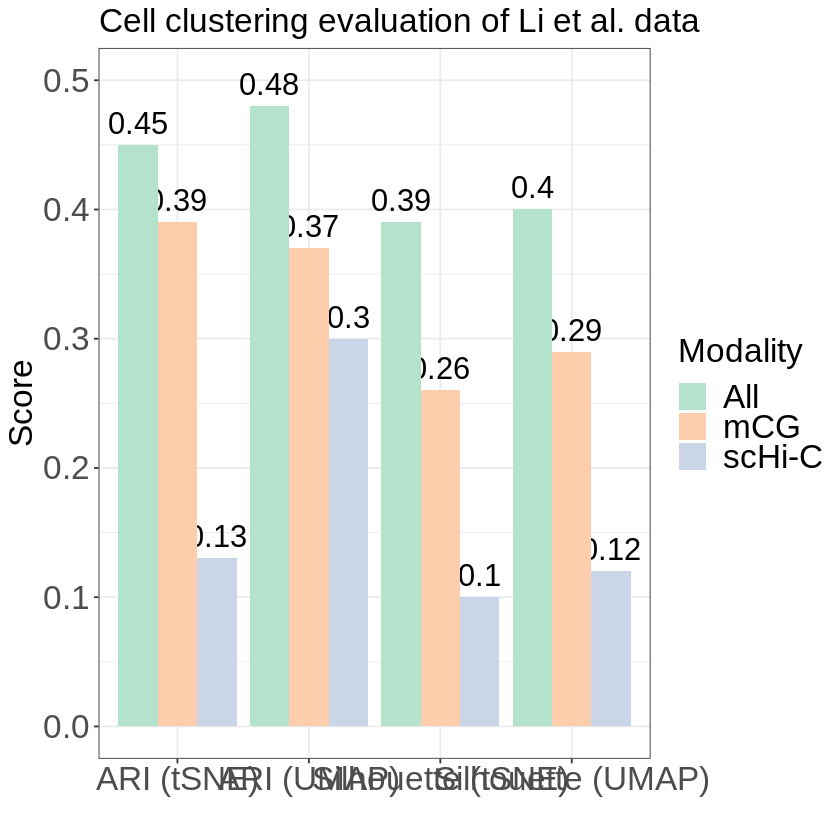

In [163]:
#mean(M/N)
(score=c(0.30,0.13,0.12,0.1,0.37,0.39,0.29,0.26,0.48,0.45,0.40,0.39))
(metric=rep(c("ARI (UMAP)","ARI (tSNE)","Silhouette (UMAP)","Silhouette (tSNE)"),3))
(Modality=c(rep("scHi-C",4),rep("mCG",4),rep("All",4)))
obj=data.frame(score,metric,Modality)
g<-ggplot(obj, aes(y=score, x=metric, fill=Modality))+ggtitle("Cell clustering evaluation of Li et al. data") +
  geom_text(aes(label=score), position=position_dodge(width=0.9), vjust=-0.5,size=6.5)+ 
    geom_bar(position='dodge', stat='identity')+ylim(c(0,0.5))+ylab("Score")+xlab(" ")+
  scale_fill_brewer(palette = "Pastel2")+theme_bw()+ 
theme(axis.text.x=element_text(size=20),axis.title=element_text(size=20),
                       axis.text.y=element_text(size=20),
                       plot.title=element_text(size=20),
     legend.text = element_text(size=20), legend.title = element_text(size=20) 
     
     )
g

[1] 0.30 0.13 0.12 0.10 0.15 0.15 0.18 0.10 0.52 0.52 0.37 0.37

[1] "ARI (UMAP)"        "ARI (tSNE)"        "Silhouette (UMAP)"
 [4] "Silhouette (tSNE)" "ARI (UMAP)"        "ARI (tSNE)"       
 [7] "Silhouette (UMAP)" "Silhouette (tSNE)" "ARI (UMAP)"       
[10] "ARI (tSNE)"        "Silhouette (UMAP)" "Silhouette (tSNE)"

[1] "scHi-C" "scHi-C" "scHi-C" "scHi-C" "mCG"    "mCG"    "mCG"    "mCG"   
 [9] "All"    "All"    "All"    "All"

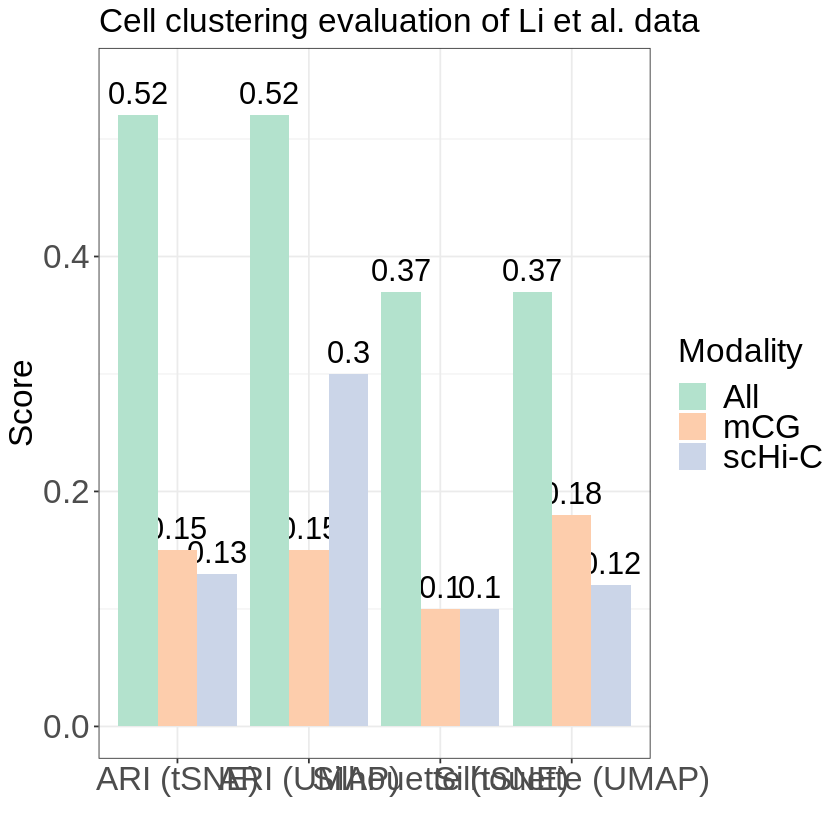

In [4]:
#sum(M/N)
(score=c(0.30,0.13,0.12,0.1,0.15,0.15,0.18,0.1,0.52,0.52,0.37,0.37))
(metric=rep(c("ARI (UMAP)","ARI (tSNE)","Silhouette (UMAP)","Silhouette (tSNE)"),3))
(Modality=c(rep("scHi-C",4),rep("mCG",4),rep("All",4)))
obj=data.frame(score,metric,Modality)
g<-ggplot(obj, aes(y=score, x=metric, fill=Modality))+ggtitle("Cell clustering evaluation of Li et al. data") +
  geom_text(aes(label=score), position=position_dodge(width=0.9), vjust=-0.5,size=6.5)+ 
    geom_bar(position='dodge', stat='identity')+ylim(c(0,0.55))+ylab("Score")+xlab(" ")+
  scale_fill_brewer(palette = "Pastel2")+theme_bw()+ 
theme(axis.text.x=element_text(size=20),axis.title=element_text(size=20),
                       axis.text.y=element_text(size=20),
                       plot.title=element_text(size=20),
     legend.text = element_text(size=20), legend.title = element_text(size=20) 
     
     )
g

[1] 0.30 0.13 0.12 0.10 0.15 0.15 0.18 0.10 0.52 0.52 0.37 0.37

[1] "ARI (UMAP)"        "ARI (tSNE)"        "Silhouette (UMAP)"
 [4] "Silhouette (tSNE)" "ARI (UMAP)"        "ARI (tSNE)"       
 [7] "Silhouette (UMAP)" "Silhouette (tSNE)" "ARI (UMAP)"       
[10] "ARI (tSNE)"        "Silhouette (UMAP)" "Silhouette (tSNE)"

[1] "scHi-C"   "scHi-C"   "scHi-C"   "scHi-C"   "mCG"      "mCG"     
 [7] "mCG"      "mCG"      "All data" "All data" "All data" "All data"

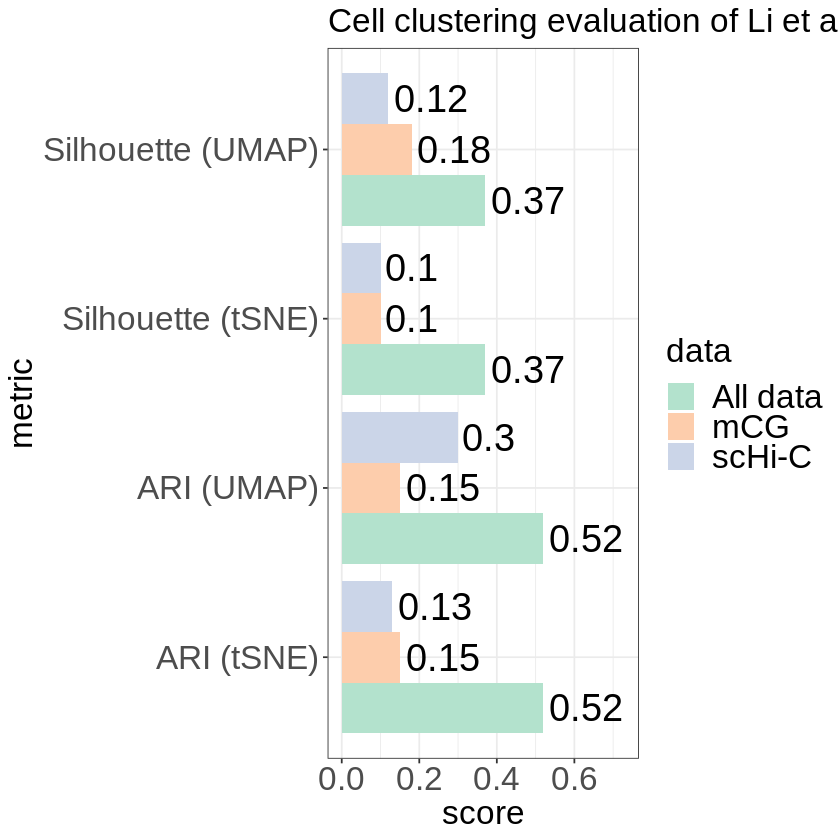

In [352]:
(score=c(0.30,0.13,0.12,0.1,0.15,0.15,0.18,0.1,0.52,0.52,0.37,0.37))
(metric=rep(c("ARI (UMAP)","ARI (tSNE)","Silhouette (UMAP)","Silhouette (tSNE)"),3))
(data=c(rep("scHi-C",4),rep("mCG",4),rep("All data",4)))
obj=data.frame(score,metric,data)
g<-ggplot(obj, aes(x=score, y=metric, fill=data))+ggtitle("Cell clustering evaluation of Li et al. data") +
  geom_text(aes(label=score), position=position_dodge(width=0.9), hjust=-0.08,size=8)+ 
    geom_bar(position='dodge', stat='identity')+xlim(c(0,0.73))+
  scale_fill_brewer(palette = "Pastel2")+theme_bw()+ 
theme(axis.text.x=element_text(size=20),axis.title=element_text(size=20),
                       axis.text.y=element_text(size=20),
                       plot.title=element_text(size=20),
     legend.text = element_text(size=20), legend.title = element_text(size=20) 
     
     )
g

In [164]:
saveRDS(g,'/afs/cs.wisc.edu/p/keles/schic/volumeC/Kwangmoon/paperprep/Figures/Fig2h.rds')